In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

### First-Order Partial Derivative (Gradient Descent)

In [2]:
# Create Seed
torch.manual_seed(0)

# Create a dummy model parameter and target input with batch and feature of 5
params = torch.rand(5,5, requires_grad=True)
target = torch.rand(5,5)
print("Initial Parameters:\n", params)
print("Target Parameters:\n", target, "\n")

# Train configurations
epoch = 40
lr = 0.1
criterion = nn.MSELoss(reduction='mean')

# Compute first order gradient (a' = a - lr*grad)
loss_1 = []
print("Start Training!")
for i in range(epoch):
    loss = criterion(params, target)
    loss_1.append(loss.item())

    params.retain_grad()
    loss.backward(create_graph=True)
    
    params = params - (lr*params.grad)
    
    if i % 10 == 0:
        print(f"Epoch {i} | Loss: {loss.item():.4f}")
    
print("\nUpdated Parameters:\n", params)

Initial Parameters:
 tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074],
        [0.6341, 0.4901, 0.8964, 0.4556, 0.6323],
        [0.3489, 0.4017, 0.0223, 0.1689, 0.2939],
        [0.5185, 0.6977, 0.8000, 0.1610, 0.2823],
        [0.6816, 0.9152, 0.3971, 0.8742, 0.4194]], requires_grad=True)
Target Parameters:
 tensor([[0.5529, 0.9527, 0.0362, 0.1852, 0.3734],
        [0.3051, 0.9320, 0.1759, 0.2698, 0.1507],
        [0.0317, 0.2081, 0.9298, 0.7231, 0.7423],
        [0.5263, 0.2437, 0.5846, 0.0332, 0.1387],
        [0.2422, 0.8155, 0.7932, 0.2783, 0.4820]]) 

Start Training!
Epoch 0 | Loss: 0.1446
Epoch 10 | Loss: 0.1231
Epoch 20 | Loss: 0.1049
Epoch 30 | Loss: 0.0893

Updated Parameters:
 tensor([[0.5118, 0.8189, 0.0741, 0.1466, 0.3256],
        [0.5437, 0.6115, 0.6985, 0.4046, 0.5000],
        [0.2617, 0.3485, 0.2717, 0.3212, 0.4171],
        [0.5207, 0.5729, 0.7408, 0.1259, 0.2428],
        [0.5609, 0.8878, 0.5059, 0.7104, 0.4366]], grad_fn=<SubBackward0>)


c:\Users\jklim\anaconda3\envs\env1\Lib\site-packages\torch\autograd\__init__.py:200: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\autograd\engine.cpp:1156.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


### Second-Order Partial Derivative (Manual)

In [3]:
# Create Seed
torch.manual_seed(0)

# Create a dummy model parameters and target parameters
params = torch.rand(5,5, requires_grad=True)
target = torch.rand(5,5)
print("Initial Parameters:\n", params)
print("Target Parameters:\n", target, "\n")

# Train configurations
epoch = 40
lr = 0.1
criterion = nn.MSELoss(reduction='mean')

# Compute second order gradient (a' = a - lr*inv(H)*grad)
loss_2 = []
hessian_matrix = torch.zeros(5*5, 5*5, dtype=torch.float32)
print("Start Training!")
for i in range(epoch):
    loss = criterion(params, target)
    loss_2.append(loss.item())
    params.retain_grad()
    loss.backward(create_graph=True)
    grad = params.grad.flatten()

    # Compute Hessian for each parameter
    for j in range(len(grad)): 
        grad_2nd = torch.autograd.grad(grad[j], params, create_graph=True)[0]
        hessian_matrix[j] = grad_2nd.flatten()
        
    params = params.view(-1) - lr*(torch.inverse(hessian_matrix) @ grad)
    params = params.view(5,5)
    
    if i % 10 == 0:
        print(f"Epoch {i} | Loss: {loss.item():.4f}")

print("\nUpdated Parameters:\n", params)

Initial Parameters:
 tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074],
        [0.6341, 0.4901, 0.8964, 0.4556, 0.6323],
        [0.3489, 0.4017, 0.0223, 0.1689, 0.2939],
        [0.5185, 0.6977, 0.8000, 0.1610, 0.2823],
        [0.6816, 0.9152, 0.3971, 0.8742, 0.4194]], requires_grad=True)
Target Parameters:
 tensor([[0.5529, 0.9527, 0.0362, 0.1852, 0.3734],
        [0.3051, 0.9320, 0.1759, 0.2698, 0.1507],
        [0.0317, 0.2081, 0.9298, 0.7231, 0.7423],
        [0.5263, 0.2437, 0.5846, 0.0332, 0.1387],
        [0.2422, 0.8155, 0.7932, 0.2783, 0.4820]]) 

Start Training!
Epoch 0 | Loss: 0.1446
Epoch 10 | Loss: 0.0176
Epoch 20 | Loss: 0.0021
Epoch 30 | Loss: 0.0003

Updated Parameters:
 tensor([[0.5521, 0.9500, 0.0369, 0.1844, 0.3724],
        [0.3100, 0.9255, 0.1866, 0.2726, 0.1578],
        [0.0364, 0.2110, 0.9164, 0.7149, 0.7357],
        [0.5262, 0.2504, 0.5878, 0.0350, 0.1408],
        [0.2487, 0.8169, 0.7873, 0.2871, 0.4810]], grad_fn=<ViewBackward0>)


### Second-Order Partial Derivative (PyTorch Function Hessian)

In [4]:
import torch
import torch.nn as nn
import torch.autograd.functional as AF

# Create Seed
torch.manual_seed(0)

# Create a dummy model parameters and target parameters
params = torch.rand(5,5, requires_grad=True)
target = torch.rand(5,5)
print("Initial Parameters:\n", params)
print("Target Parameters:\n", target, "\n")

# Train configurations
epoch = 40
lr = 0.1
criterion = nn.MSELoss(reduction='mean')

# Compute second order gradient (a' = a - lr*inv(H)*grad)
def compute_loss(params, target):
    loss = criterion(params, target)
    return loss

loss_3 = []
print("Start Training!")
for i in range(epoch):
    loss = criterion(params, target)
    params.retain_grad()
    loss.backward(create_graph=True)
    loss_3.append(loss.item())
    grad = params.grad.flatten()
    
    hessian_matrix = AF.hessian(compute_loss, (params, target))[0][0].view(25,25)
    params = params.view(-1) - lr*(torch.inverse(hessian_matrix) @ grad)
    params = params.view(5,5)
    
    if i % 10 == 0:
        print(f"Epoch {i} | Loss: {loss.item():.4f}")

print("\nUpdated Parameters:\n", params)

Initial Parameters:
 tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074],
        [0.6341, 0.4901, 0.8964, 0.4556, 0.6323],
        [0.3489, 0.4017, 0.0223, 0.1689, 0.2939],
        [0.5185, 0.6977, 0.8000, 0.1610, 0.2823],
        [0.6816, 0.9152, 0.3971, 0.8742, 0.4194]], requires_grad=True)
Target Parameters:
 tensor([[0.5529, 0.9527, 0.0362, 0.1852, 0.3734],
        [0.3051, 0.9320, 0.1759, 0.2698, 0.1507],
        [0.0317, 0.2081, 0.9298, 0.7231, 0.7423],
        [0.5263, 0.2437, 0.5846, 0.0332, 0.1387],
        [0.2422, 0.8155, 0.7932, 0.2783, 0.4820]]) 

Start Training!
Epoch 0 | Loss: 0.1446
Epoch 10 | Loss: 0.0176
Epoch 20 | Loss: 0.0021
Epoch 30 | Loss: 0.0003

Updated Parameters:
 tensor([[0.5521, 0.9500, 0.0369, 0.1844, 0.3724],
        [0.3100, 0.9255, 0.1866, 0.2726, 0.1578],
        [0.0364, 0.2110, 0.9164, 0.7149, 0.7357],
        [0.5262, 0.2504, 0.5878, 0.0350, 0.1408],
        [0.2487, 0.8169, 0.7873, 0.2871, 0.4810]], grad_fn=<ViewBackward0>)


### Graph Comparison & Relative Percentage Improvement

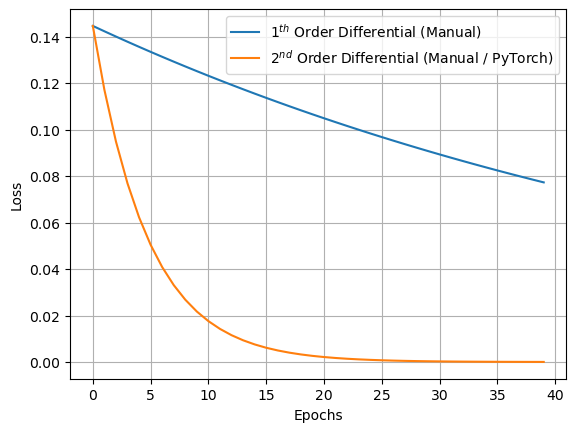

In [5]:
# 1st vs 2nd Order Differential Loss Result Comparison
fig, ax = plt.subplots(1, 1)
ax.plot(loss_1, label='$1^{th}$ Order Differential (Manual)')
ax.plot(loss_2, label='$2^{nd}$ Order Differential (Manual / PyTorch)')
ax.set_ylabel("Loss")
ax.set_xlabel("Epochs")
plt.legend(loc='upper right')
plt.grid()

In [6]:
# Relative Percentage Improvement
initial_loss_1st = 0.1446
final_loss_1st = 0.0893

initial_loss_2nd = 0.1446
final_loss_2nd = 0.0003

decrease_percent_1st = ((initial_loss_1st - final_loss_1st) / initial_loss_1st) * 100
decrease_percent_2nd = ((initial_loss_2nd - final_loss_2nd) / initial_loss_2nd) * 100

print("## Relative Percentage Improvement ##")
print(f"1st Order Differential Optimization (Manual): {decrease_percent_1st:.1f}%")
print(f"2nd Order Differential Optimization (Manual/PyTorch): {decrease_percent_2nd:.1f}%")

## Relative Percentage Improvement ##
1st Order Differential Optimization (Manual): 38.2%
2nd Order Differential Optimization (Manual/PyTorch): 99.8%
